# PSM on K72 Hepatic Failure Cohort

## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Data Prep

In [2]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_for_PSM_1.csv')

In [3]:
df.shape

(27039, 22)

In [4]:
df.albumin.value_counts()

0    19109
1     7930
Name: albumin, dtype: int64

In [5]:
df.albumin_timing.value_counts()

0.0    23634
1.0     2121
2.0     1284
Name: albumin_timing, dtype: int64

In [6]:
df[df['albumin'] == 1].albumin_timing.value_counts()

0.0    4525
1.0    2121
2.0    1284
Name: albumin_timing, dtype: int64

In [7]:
df[df['albumin'] == 1].albumin_lab_baseline_severity.value_counts()

1    7930
Name: albumin_lab_baseline_severity, dtype: int64

In [8]:
df[df['albumin'] == 0].albumin_lab_baseline_severity.value_counts()

0    11367
1     7742
Name: albumin_lab_baseline_severity, dtype: int64

In [9]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [10]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  albumin_lab_baseline_severity  hgb_bl  90_day_mortality  \
0               2.8                              1    11.5                 1   
1               2.6                              1    11.6                 1   
2               1.3                              1     3.8                 0   
3               1.7                              1    11.6                 1   
4               2.7                              1    15.5                 1   

   90_day_readmission  hospital_free_days  beta_blocker  Cirrhosis  CCI  \
0                 0.0                   0             0          1    3   
1                 0.0                   0             0          1    7   
2                 1.0                  12             1          1    3   
3                 0.0                   0             0          0    4   
4                 0.0                   0             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  
0      0  23.508     0     0        1  
1      1  31.904     1     3        1  
2      0  28.610     0     0        1  
3      2  21.000     2     3        1  
4      2  22.640     3     1        1

## Save df with pid, eid, outcomes, any other

In [11]:
df_o = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [12]:
df_o.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  
0  3.039583                 1                 0.0                   0  
1  5.045833                 1                 0.0                   0  
2  6.143056                 0                 1.0                  12  
3  4.893056                 1                 0.0                   0  
4  3.818056                 1                 0.0                   0

In [13]:
# df.drop(columns=['personid', 'encounterid'], inplace=True)

In [14]:
df.shape

(27039, 22)

In [15]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  albumin_lab_baseline_severity  hgb_bl  90_day_mortality  \
0               2.8                              1    11.5                 1   
1               2.6                              1    11.6                 1   
2               1.3                              1     3.8                 0   
3               1.7                              1    11.6                 1   
4               2.7                              1    15.5                 1   

   90_day_readmission  hospital_free_days  beta_blocker  Cirrhosis  CCI  \
0                 0.0                   0             0          1    3   
1                 0.0                   0             0          1    7   
2                 1.0                  12             1          1    3   
3                 0.0                   0             0          0    4   
4                 0.0                   0             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  
0      0  23.508     0     0        1  
1      1  31.904     1     3        1  
2      0  28.610     0     0        1  
3      2  21.000     2     3        1  
4      2  22.640     3     1        1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27039 entries, 0 to 27038
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       27039 non-null  object 
 1   encounterid                    27039 non-null  object 
 2   age                            27039 non-null  float64
 3   sex                            27039 non-null  int64  
 4   ICU                            27039 non-null  int64  
 5   LOS_days                       27039 non-null  float64
 6   time_to_albumin                27039 non-null  float64
 7   albumin_timing                 27039 non-null  float64
 8   bl_albumin_value               27039 non-null  float64
 9   albumin_lab_baseline_severity  27039 non-null  int64  
 10  hgb_bl                         27039 non-null  float64
 11  90_day_mortality               27039 non-null  int64  
 12  90_day_readmission             27039 non-null 

In [17]:
dict_columns_type = {'sex': float,
                     'ICU': float,
                     'albumin_lab_baseline_severity': float,
                     '90_day_mortality': float,
                     'hospital_free_days': float,
                     'beta_blocker': float,
                     'Cirrhosis': float,
                     'CCI': float,
                     'qSOFA': float,
                     'SEWS': float,
                     'ACLF': float,
                     'albumin': float,
                     }

# df = df.astype(dict_columns_type)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27039 entries, 0 to 27038
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       27039 non-null  object 
 1   encounterid                    27039 non-null  object 
 2   age                            27039 non-null  float64
 3   sex                            27039 non-null  int64  
 4   ICU                            27039 non-null  int64  
 5   LOS_days                       27039 non-null  float64
 6   time_to_albumin                27039 non-null  float64
 7   albumin_timing                 27039 non-null  float64
 8   bl_albumin_value               27039 non-null  float64
 9   albumin_lab_baseline_severity  27039 non-null  int64  
 10  hgb_bl                         27039 non-null  float64
 11  90_day_mortality               27039 non-null  int64  
 12  90_day_readmission             27039 non-null 

## Initialize PsmPy Class

In [21]:
psm = PsmPy(df, treatment= 'albumin', indx='encounterid', exclude = ['albumin_timing', 'time_to_albumin', 'albumin_lab_baseline_severity', 'personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days'])

In [22]:
%%time
psm.logistic_ps(balance = True)

Wall time: 38.7 s


In [23]:
df_psm = psm.predicted_data

In [24]:
df_psm.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.248421         -1.107052        1  
1          0.677045          0.740225        1  
2          0.898818          2.184159        1  
3          0.942134          2.790018        1  
4          0.508828          0.035314        1

In [25]:
df_psm.bl_albumin_value.describe()

count    27039.000000
mean         2.849946
std          0.789459
min          0.600000
25%          2.300000
50%          2.800000
75%          3.400000
max          5.200000
Name: bl_albumin_value, dtype: float64

In [26]:
df_psm.propensity_logit.describe()

count    27039.000000
mean        -0.648682
std          2.141491
min         -7.458294
25%         -2.198775
50%         -0.555921
75%          0.863124
max          6.066176
Name: propensity_logit, dtype: float64

In [27]:
df_psm[df_psm['bl_albumin_value'] > 3.4].propensity_logit.describe()

count    6511.000000
mean       -3.392708
std         1.069659
min        -7.458294
25%        -4.034376
50%        -3.257722
75%        -2.637477
max        -0.242756
Name: propensity_logit, dtype: float64

## Plot the propensity score / propensity logits

In [28]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 1h 17min 27s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


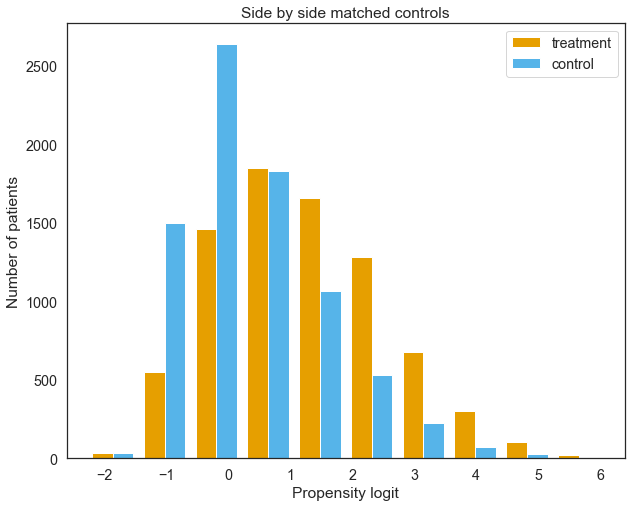

In [29]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

In [30]:
df_psm.propensity_logit.describe()

count    27039.000000
mean        -0.648682
std          2.141491
min         -7.458294
25%         -2.198775
50%         -0.555921
75%          0.863124
max          6.066176
Name: propensity_logit, dtype: float64

## Plot the effect sizes

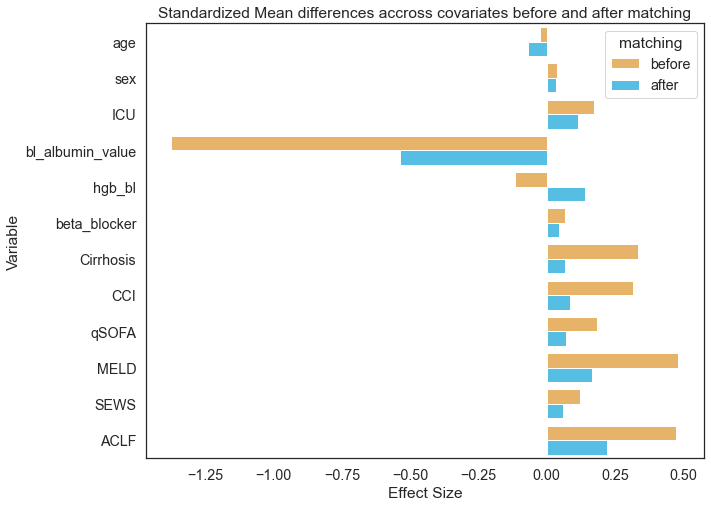

In [31]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [32]:
matched_df = psm.df_matched

In [33]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.248421         -1.107052        1  
1          0.677045          0.740225        1  
2          0.898818          2.184159        1  
3          0.942134          2.790018        1  
4          0.508828          0.035314        1

In [34]:
matched_df.shape

(15859, 16)

## Matched Ids

In [35]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  cca2410f-9753-44bb-b5ed-e8297eb20f77
1  039ff346-b163-4f39-8e64-dca1f76f794e  a8eea299-5214-4029-ad22-073cf36d8ba3
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  e8de2949-a5f3-4652-a53a-f88b78db30d8
3  4d71b500-d898-4675-a9f0-218fe5dee40f  a0459dad-007c-486f-92e4-417daf397c30
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  bd71065e-6457-42bf-b569-f6a3fe01f879

## Effect sizes per variables

In [36]:
psm.effect_size

Variable matching  Effect Size
0                age   before    -0.026429
1                age    after    -0.070147
2                sex   before     0.037890
3                sex    after     0.033768
4                ICU   before     0.173580
5                ICU    after     0.114519
6   bl_albumin_value   before    -1.375037
7   bl_albumin_value    after    -0.537596
8             hgb_bl   before    -0.115420
9             hgb_bl    after     0.138825
10      beta_blocker   before     0.068463
11      beta_blocker    after     0.046415
12         Cirrhosis   before     0.333236
13         Cirrhosis    after     0.065950
14               CCI   before     0.314333
15               CCI    after     0.084974
16             qSOFA   before     0.182023
17             qSOFA    after     0.070495
18              MELD   before     0.481996
19              MELD    after     0.164222
20              SEWS   before     0.121122
21              SEWS    after     0.057522
22              ACLF   before     0.474110
23              ACLF    after     0.219122

## Explore Matched df

In [37]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  
0          0.248421         -1.107052        1  
1          0.677045          0.740225        1  
2          0.898818          2.184159        1  
3          0.942134          2.790018        1  
4          0.508828          0.035314        1

In [38]:
matched_df.albumin.value_counts()

1    7930
0    7929
Name: albumin, dtype: int64

In [39]:
matched_df.shape

(15859, 16)

## Join Matched df with earlier df on encounterid to add outcome variables

In [40]:
f_df = matched_df.merge(df_o, on='encounterid', how='left')

In [41]:
f_df.shape

(15859, 21)

In [42]:
f_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  039ff346-b163-4f39-8e64-dca1f76f794e  58.0    1    0               2.6   
2  1370bec9-c0c6-47fd-8481-a04ad194ba53  44.0    1    0               1.3   
3  4d71b500-d898-4675-a9f0-218fe5dee40f  83.0    0    1               1.7   
4  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    11.6             0          1    7      1  31.904     1     3   
2     3.8             1          1    3      0  28.610     0     0   
3    11.6             0          0    4      2  21.000     2     3   
4    15.5             0          0    2      2  22.640     3     1   

   propensity_score  propensity_logit  albumin  \
0          0.248421         -1.107052        1   
1          0.677045          0.740225        1   
2          0.898818          2.184159        1   
3          0.942134          2.790018        1   
4          0.508828          0.035314        1   

                               personid  LOS_days  90_day_mortality  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  3.039583                 1   
1  016db409-ef15-4326-a6e6-9661b6992976  5.045833                 1   
2  09264b14-79e8-47d4-85ea-9e46696f953f  6.143056                 0   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4.893056                 1   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  3.818056                 1   

   90_day_readmission  hospital_free_days  
0                 0.0                   0  
1                 0.0                   0  
2                 1.0                  12  
3                 0.0                   0  
4                 0.0                   0

In [43]:
# rearrange columns

print(f_df.columns.to_list())

['encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', 'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'ACLF', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']


In [44]:
f_df = f_df[['personid', 'encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', \
             'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', \
             'qSOFA', 'MELD', 'SEWS', 'ACLF', 'albumin', \
             'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [45]:
f_df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  58.0    1    0               2.6    11.6             0          1    7   
2  44.0    1    0               1.3     3.8             1          1    3   
3  83.0    0    1               1.7    11.6             0          0    4   
4  37.0    0    1               2.7    15.5             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  LOS_days  90_day_mortality  \
0      0  23.508     0     0        1  3.039583                 1   
1      1  31.904     1     3        1  5.045833                 1   
2      0  28.610     0     0        1  6.143056                 0   
3      2  21.000     2     3        1  4.893056                 1   
4      2  22.640     3     1        1  3.818056                 1   

   90_day_readmission  hospital_free_days  
0                 0.0                   0  
1                 0.0                   0  
2                 1.0                  12  
3                 0.0                   0  
4                 0.0                   0

In [46]:
f_df[f_df['albumin'] == 1].bl_albumin_value.describe()

count    7930.000000
mean        2.199676
std         0.469092
min         0.600000
25%         1.900000
50%         2.300000
75%         2.600000
max         2.900000
Name: bl_albumin_value, dtype: float64

In [47]:
f_df[f_df['albumin'] == 0].bl_albumin_value.describe()

count    7929.000000
mean        2.450428
std         0.463755
min         0.600000
25%         2.200000
50%         2.500000
75%         2.800000
max         3.700000
Name: bl_albumin_value, dtype: float64

In [50]:
f_df[f_df['albumin'] == 1].LOS_days.describe()

count    7930.000000
mean       12.286335
std         9.645237
min         0.196528
25%         4.996181
50%         9.804167
75%        16.919097
max        50.389583
Name: LOS_days, dtype: float64

In [51]:
f_df[f_df['albumin'] == 0].LOS_days.describe()

count    7929.000000
mean        6.265652
std         6.959915
min         0.000000
25%         1.663194
50%         4.014583
75%         8.286111
max        50.302199
Name: LOS_days, dtype: float64

In [48]:
f_df.shape

(15859, 19)

In [52]:
f_df.albumin.value_counts()

1    7930
0    7929
Name: albumin, dtype: int64

In [49]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_MATCHED_1.csv', index=False)